In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
# Load the dataset
data = pd.read_csv('/Supermart Grocery Sales - Retail Analytics Dataset.csv')
# Display the first few rows of the dataset
print(data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [50]:
# Check for missing values
print(data.isnull().sum())
# Drop any rows with missing values
data.dropna(inplace=True)
# Check for duplicates
data.drop_duplicates(inplace=True)

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [51]:
print(data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [52]:
# Convert 'Order Date' to datetime format, coercing errors
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Check for any NaT values
invalid_dates = data['Order Date'].isna().sum()
print(f"Number of invalid dates: {invalid_dates}")

# Extract day, month, and year from 'Order Date' only if conversion was successful
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

Number of invalid dates: 5952


In [53]:
# Attempt to convert 'Order Date' with inferred format
data['Order Date'] = pd.to_datetime(data['Order Date'], infer_datetime_format=True, errors='coerce')

# Check remaining invalid dates
invalid_dates = data['Order Date'].isna().sum()
print(f"Number of invalid dates after conversion: {invalid_dates}")

# Optional: Fill or drop remaining invalid dates if necessary
# For example, fill with a placeholder date
data['Order Date'].fillna(pd.Timestamp('2020-01-01'), inplace=True)

# Extract day, month, and year if needed
data['Order Day'] = data['Order Date'].dt.day
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

Number of invalid dates after conversion: 5952


<ipython-input-53-043697a40ddb>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Order Date'] = pd.to_datetime(data['Order Date'], infer_datetime_format=True, errors='coerce')
<ipython-input-53-043697a40ddb>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Order Date'].fillna(pd.Timestamp('2020-01-0

In [54]:
print (data.head(5))

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

  Order Date Region  Sales  Discount  Profit       State  Order Day  \
0 2017-11-08  North   1254      0.12  401.28  Tamil Nadu          8   
1 2017-11-08  South    749      0.18  149.80  Tamil Nadu          8   
2 2017-06-12   West   2360      0.21  165.20  Tamil Nadu         12   
3 2016-10-11  South    896      0.25   89.60  Tamil Nadu         11   
4 2016-10-11  South   2355      0.26  918.45  Tamil Nadu         11   

   Order Month  Order Year  
0           11        2017  
1           11        2017  
2            6        2

                 Sales
City                  
Kanyakumari     706764
Vellore         676550
Bodi            667177
Tirunelveli     659812
Perambalur      659738
Salem           657093
Pudukottai      653179
Tenkasi         643652
Karur           642273
Krishnagiri     637273
Chennai         634963
Coimbatore      634748
Ramanadhapuram  634386
Cumbum          626047
Madurai         617836
Virudhunagar    606820
Ooty            599292
Namakkal        598530
Viluppuram      581274
Theni           579553
Dindigul        575631
Dharmapuri      571553
Nagercoil       551435
Trichy          541403


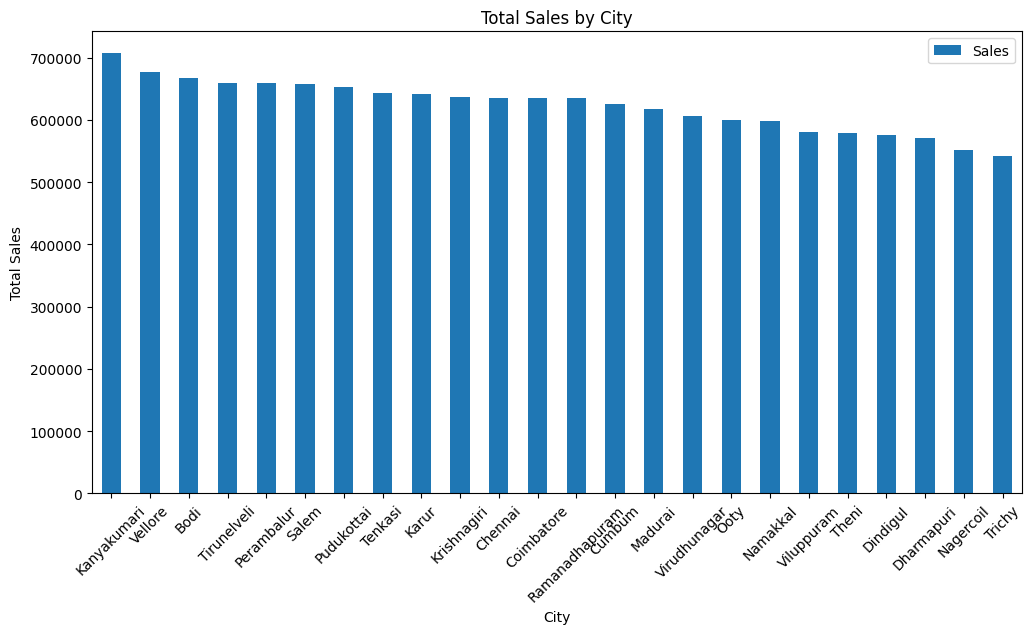

In [55]:
# Step 1: Extract relevant columns
city_sales = data[['City', 'Sales']]

# Step 2: Calculate total sales per city
total_sales = city_sales.groupby('City').sum()

# Step 3: Sort the cities by sales
total_sales_sorted = total_sales.sort_values(by='Sales', ascending=False)

# Print or visualize the sorted total sales
print(total_sales_sorted)
import matplotlib.pyplot as plt

# Plotting total sales by city
total_sales_sorted.plot(kind='bar', figsize=(12, 6))
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [56]:
# Initialize the label encoder
le = LabelEncoder()
# Encode categorical variables
data['Category_n'] = le.fit_transform(data['Category'])
data['Sub Category_n'] = le.fit_transform(data['Sub Category'])
data['City_n'] = le.fit_transform(data['City'])
data['Region_n'] = le.fit_transform(data['Region'])
data['State_n'] = le.fit_transform(data['State'])
data['Order Month'] = le.fit_transform(data['Order Month'])

In [57]:
print(data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

  Order Date Region  Sales  Discount  Profit       State  Order Day  \
0 2017-11-08  North   1254      0.12  401.28  Tamil Nadu          8   
1 2017-11-08  South    749      0.18  149.80  Tamil Nadu          8   
2 2017-06-12   West   2360      0.21  165.20  Tamil Nadu         12   
3 2016-10-11  South    896      0.25   89.60  Tamil Nadu         11   
4 2016-10-11  South   2355      0.26  918.45  Tamil Nadu         11   

   Order Month  Order Year  Category_n  Sub Category_n  City_n  Region_n  \
0           10        2017        

<ipython-input-58-3f667acf397d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category_n', y='Sales', data=data, palette='Set2')


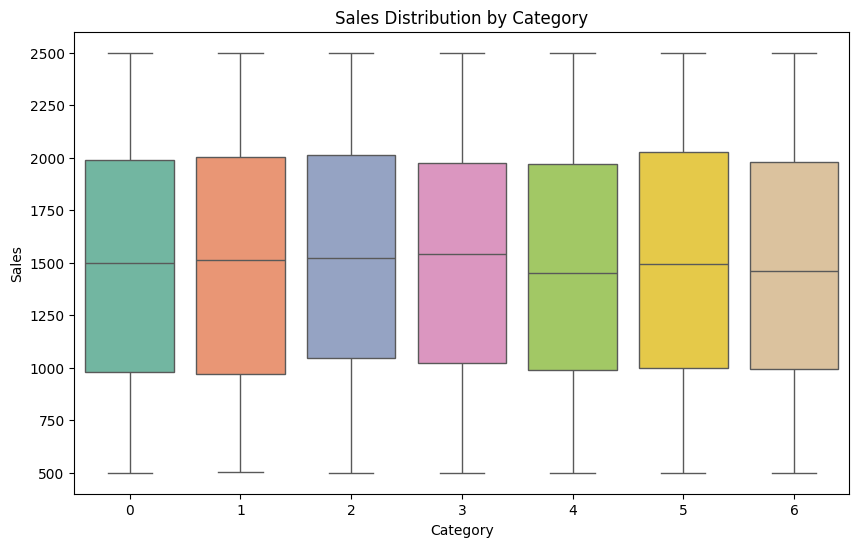

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category_n', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

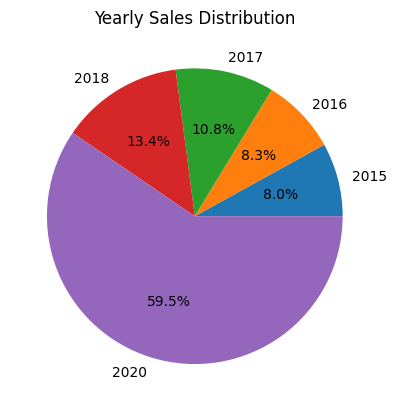

In [59]:
# We want to find the Yearly Sales
# Group by 'Order Year' and get the total sales for each year
Yearly_Sales = data.groupby("Order Year")["Sales"].sum()

# Create a pie chart with the sales by year
import matplotlib.pyplot as plt

plt.pie(Yearly_Sales, labels=Yearly_Sales.index, autopct='%1.1f%%')
plt.title('Yearly Sales Distribution')
plt.show()

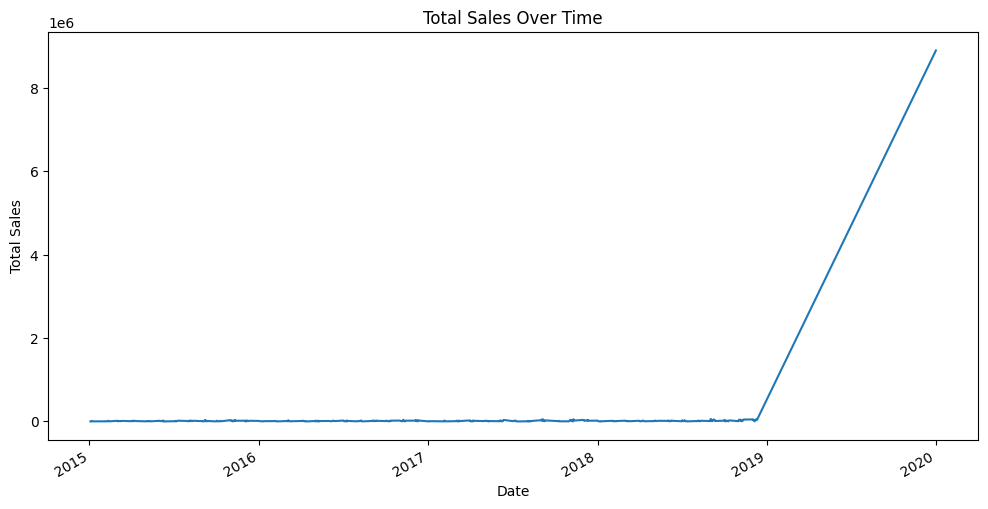

In [60]:
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

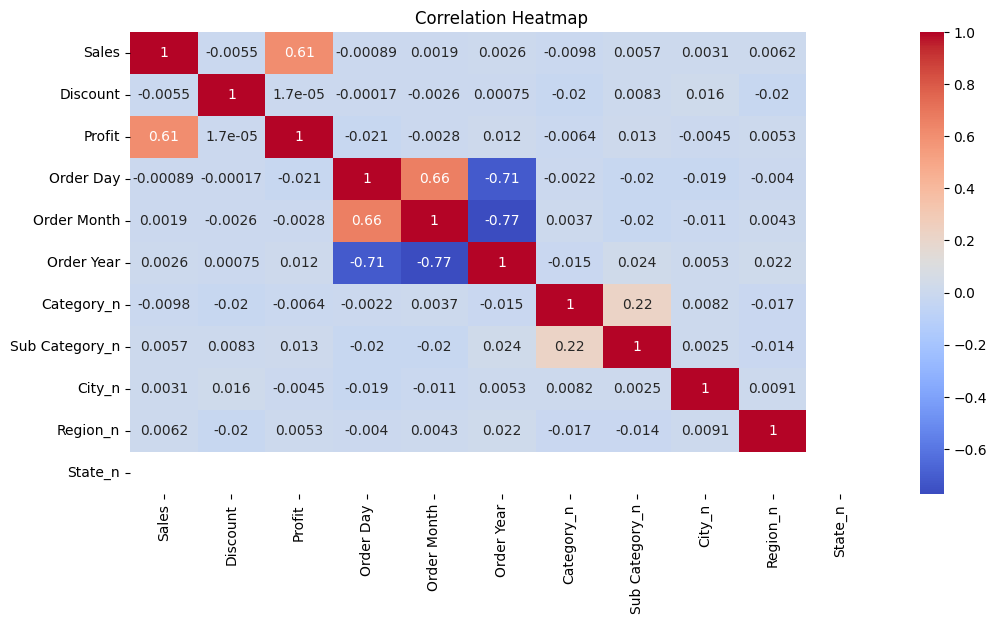

In [61]:
# Filter numeric columns only for correlation matrix
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [71]:
# Select features and target variable
features = data.drop(columns=['Order ID', 'Customer Name',
'Order Date', 'Sales', 'Order Month', 'Category', 'Sub Category', 'City', 'Region', 'State'])
target = data['Sales']

In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)
print(X_train.dtypes)

Discount          float64
Profit            float64
Order Day           int32
Order Year          int32
Category_n          int64
Sub Category_n      int64
City_n              int64
Region_n            int64
State_n             int64
dtype: object


In [73]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [74]:
# Initialize the model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

In [75]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 212748.11165520863
R-squared: 0.3549502742330567


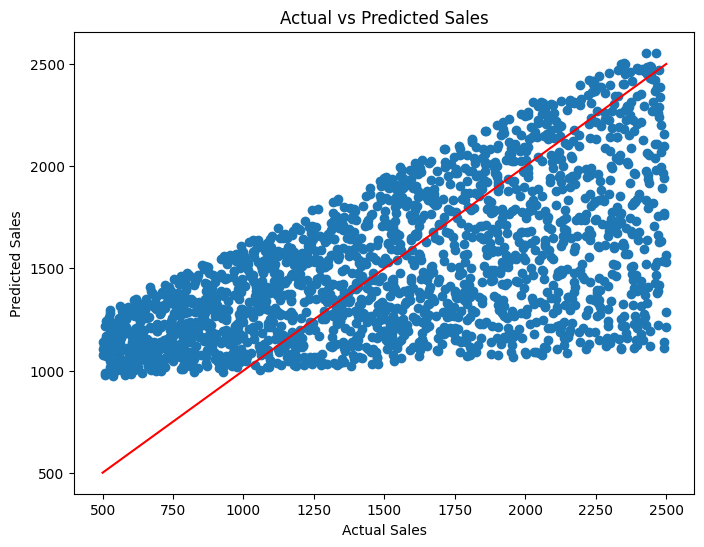

In [76]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),
max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()